### Sales Prediction for Big Mart Outlets

The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. The aim is to build a predictive model and predict the sales of each product at a particular outlet.

Using this model, BigMart will try to understand the properties of products and outlets which play a key role in increasing sales.

Please note that the data may have missing values as some stores might not report all the data due to technical glitches. Hence, it will be required to treat them accordingly.

Try and Build Regression model using all the techniques of regression: Linear, Ridge, Lasso, Decision Tree and XGboost

In [1]:
# importing required data and libraries
import pandas as pd
from sklearn.tree import plot_tree
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")


# read the train data
data=pd.read_csv("trainbigmart.csv")

In [2]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [4]:
# check for the null values and explore shape as well

data.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

There are only two variables with missing values – Item_Weight and Outlet_Size.

Since Item_Weight is a continuous variable, we can use either mean or median to impute the missing values. On the other hand, Outlet_Size is a categorical variable and hence we will replace the missing values by the mode of the column. You can try different methods to impute missing values as well.



In [5]:
data.shape

(8523, 12)

In [8]:
# impute missing values in item weight by mean
data["Item_Weight"].fillna(data["Item_Weight"].mean(),inplace=True)

# impute outlet size in training data by mode
outlet_size_mode = data.pivot_table(values='Outlet_Size', columns='Outlet_Type', aggfunc=(lambda x: x.mode()[0]))
miss_bool = data['Outlet_Size'].isnull() #False=>present , True =>missing
data.loc[miss_bool, 'Outlet_Size'] = data.loc[miss_bool, 'Outlet_Type'].apply(lambda x: outlet_size_mode[x])


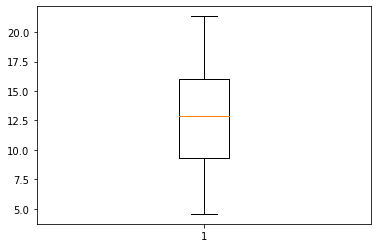

In [9]:
#create box plot on Item weight
plt.boxplot(data["Item_Weight"])
plt.show()


In [10]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [11]:
# check for the null values again
data.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

### Explore the categorical columns

In [12]:
data.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

Encode the categorical variables

To check the categorical variables in the data, you can use the train_data.dtypes() function. This will give you a list of the data types against each variable. For the BigMart sales data, we have the following categorical variable –

Item_Fat_Content

Item_Type,

Outlet_Identifier

Outlet_Size,

Outlet_Location_Type, and

Outlet_Type

In [13]:
from sklearn.preprocessing import LabelEncoder
categorical_cols = ['Item_Fat_Content',
                    'Item_Type',
                    'Outlet_Identifier',
                    'Outlet_Size',
                    'Outlet_Location_Type',
                    'Outlet_Type']
le = LabelEncoder()
# apply le on categorical feature columns
data[categorical_cols] = data[categorical_cols].apply(lambda col: le.fit_transform(col))

Explore categorical columns after label encoding


In [14]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,1,0.016047,4,249.8092,9,1999,1,0,1,3735.1380
1,DRC01,5.92,2,0.019278,14,48.2692,3,2009,1,2,2,443.4228
2,FDN15,17.50,1,0.016760,10,141.6180,9,1999,1,0,1,2097.2700
3,FDX07,19.20,2,0.000000,6,182.0950,0,1998,2,2,0,732.3800
4,NCD19,8.93,1,0.000000,9,53.8614,1,1987,0,2,1,994.7052


### Scale the data:

So far we have taken care of the missing values and the categorical (string) variables in the data. Next we will work with the continuous variables. Often the continuous variables in the data have different scales, for instance, a variable V1 can have a range from 0 to 1 while another variable can have a range from 0-1000.

Based on the type of model you are building, you will have to normalize the data in such a way that the range of all the variables is almost similar

In [15]:
#apply standard scaler on Item MRP column only
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
data["Item_MRP"]=scale.fit_transform(data[["Item_MRP"]])


### Model Building

Now that we are done with the basic pre-processing steps, we can go ahead and build simple machine learning models over this data. We will try two models here – Linear Regression to predict the sales.

To compare the performance of the models, we will create a validation set (or test set). Here I have randomly split the data into two parts using the train_test_split() function, such that the validation set holds 25% of the data points while the train set has 75%

In [16]:
# importing libraries for model building
from sklearn.model_selection import train_test_split

# separate the independent and target variable
x=data.drop(['Item_Outlet_Sales','Item_Identifier'],axis=1)
y=data["Item_Outlet_Sales"]

# randomly split the data
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=1)

# shape of train and test splits
print(x_train.shape)
print(x_test.shape)

(6392, 10)
(2131, 10)


GO ahead and perfom model building using Multiple methods. Feel Free to perform any additional preprocessing

# Model Building

# Linear Regression

In [17]:
from sklearn.linear_model import LinearRegression  
regressor= LinearRegression()  
regressor.fit(x_train, y_train)
y_pred_train_lr=regressor.predict(x_train)
y_pred_test_lr=regressor.predict(x_test)

In [18]:
#Accuracy on train data
acc_train_linear_regression=regressor.score(x_train,y_train)
acc_train_linear_regression

0.5048357248419655

In [19]:
#Accuracy on test data
acc_test_linear_regression=regressor.score(x_test,y_test)
acc_test_linear_regression

0.49922253943397

In [20]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

print("Model Evaluation for Linear Regression")
print("-----------------------Model Evaluation for training data --------------------------")
print("The Mean Squared Error for Linear regression is:       ",mean_squared_error(y_train,y_pred_train_lr))
print("The Mean Absolute Error for Linear regression is:      ",mean_absolute_error(y_train,y_pred_train_lr))
print("The Root Mean Squared Error for Linear Regression is:  ",np.sqrt(mean_squared_error(y_train,y_pred_train_lr)))
print("\n---------------------Model Evaluation for testing data ---------------------------")
print("The Mean Squared Error for Linear regression is:       ",mean_squared_error(y_test,y_pred_test_lr))
print("The Mean Absolute Error for Linear regression is:      ",mean_absolute_error(y_test,y_pred_test_lr))
print("The Root Mean Squared Error for Linear Regression is:  ",np.sqrt(mean_squared_error(y_test,y_pred_test_lr)))

Model Evaluation for Linear Regression
-----------------------Model Evaluation for training data --------------------------
The Mean Squared Error for Linear regression is:        1444338.8631117987
The Mean Absolute Error for Linear regression is:       900.1392686601853
The Root Mean Squared Error for Linear Regression is:   1201.8064998625189

---------------------Model Evaluation for testing data ---------------------------
The Mean Squared Error for Linear regression is:        1450217.990969197
The Mean Absolute Error for Linear regression is:       915.6536622501253
The Root Mean Squared Error for Linear Regression is:   1204.2499703006833


In [21]:
#Checking the significant features


# Ridge Regression

In [22]:
from sklearn.linear_model import Ridge
RR =Ridge(alpha=0.1)
RR.fit(x_train,y_train)
y_pred_train_rr=RR.predict(x_train)
y_pred_test_rr=RR.predict(x_test)

In [23]:
#Accuracy on train data
acc_train_Ridge_regression=RR.score(x_train,y_train)
acc_train_Ridge_regression

0.5048356278552245

In [24]:
#Accuracy on test data
acc_test_Ridge_regression=RR.score(x_test,y_test)
acc_test_Ridge_regression

0.4992316540876308

In [25]:
print("Model Evaluation for Ridge Regression")
print("-----------------------Model Evaluation for training data --------------------------")
print("The Mean Squared Error for ridge regression is:       ",mean_squared_error(y_train,y_pred_train_rr))
print("The Mean Absolute Error for ridge regression is:      ",mean_absolute_error(y_train,y_pred_train_rr))
print("The Root Mean Squared Error for Ridge Regression is:  ",np.sqrt(mean_squared_error(y_train,y_pred_train_rr)))
print("\n---------------------Model Evaluation for testing data ---------------------------")
print("The Mean Squared Error for ridge regression is:       ",mean_squared_error(y_test,y_pred_test_rr))
print("The Mean Absolute Error for ridge regression is:      ",mean_absolute_error(y_test,y_pred_test_rr))
print("The Root Mean Squared Error for Ridge Regression is:  ",np.sqrt(mean_squared_error(y_test,y_pred_test_rr)))


Model Evaluation for Ridge Regression
-----------------------Model Evaluation for training data --------------------------
The Mean Squared Error for ridge regression is:        1444339.1460112848
The Mean Absolute Error for ridge regression is:       900.137237008462
The Root Mean Squared Error for Ridge Regression is:   1201.806617560115

---------------------Model Evaluation for testing data ---------------------------
The Mean Squared Error for ridge regression is:        1450191.5955425631
The Mean Absolute Error for ridge regression is:       915.6513394748958
The Root Mean Squared Error for Ridge Regression is:   1204.2390109702321


# Ridge CV

In [26]:
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import RidgeCV
from numpy import arange
#instantiate repeated k-fold
rcv = RepeatedKFold(n_splits=10,n_repeats=3,random_state=42)

#instantiate ridgecv
ridgecv = RidgeCV(alphas=arange(0.1, 1, 0.01), cv=rcv, scoring='neg_mean_absolute_error')

#fitting ridge model
ridgecv.fit(x_train, y_train)
y_pred_train_rcv=ridgecv.predict(x_train)
y_pred_test_rcv=ridgecv.predict(x_test)

In [27]:
#accuracy on train data

acc_train_ridgecv=ridgecv.score(x_train,y_train)
acc_train_ridgecv

0.5048271931835807

In [28]:
#Accuracy on test data
acc_test_ridgecv=ridgecv.score(x_test,y_test)
acc_test_ridgecv

0.4993002388527126

In [29]:
print("Model Evaluation for Ridge CV")
print("-----------------------Model Evaluation for training data --------------------------")
print("The Mean Squared Error for ridge CV is:       ",mean_squared_error(y_train,y_pred_train_rcv))
print("The Mean Absolute Error for ridge CV is:      ",mean_absolute_error(y_train,y_pred_train_rcv))
print("The Root Mean Squared Error for Ridge CV is:  ",np.sqrt(mean_squared_error(y_train,y_pred_train_rcv)))
print("\n---------------------Model Evaluation for testing data ---------------------------")
print("The Mean Squared Error for ridge CV is:       ",mean_squared_error(y_test,y_pred_test_rcv))
print("The Mean Absolute Error for ridge CV is:      ",mean_absolute_error(y_test,y_pred_test_rcv))
print("The Root Mean Squared Error for Ridge CV is:  ",np.sqrt(mean_squared_error(y_test,y_pred_test_rcv)))


Model Evaluation for Ridge CV
-----------------------Model Evaluation for training data --------------------------
The Mean Squared Error for ridge CV is:        1444363.749006016
The Mean Absolute Error for ridge CV is:       900.1314675213666
The Root Mean Squared Error for Ridge CV is:   1201.8168533541273

---------------------Model Evaluation for testing data ---------------------------
The Mean Squared Error for ridge CV is:        1449992.9786557017
The Mean Absolute Error for ridge CV is:       915.632029349304
The Root Mean Squared Error for Ridge CV is:   1204.1565424211678


# Lasso Regression

In [30]:
from sklearn.linear_model import Lasso
lr=Lasso()
lr.fit(x_train,y_train)
y_pred_train_lr=lr.predict(x_train)
y_pred_test_lr=lr.predict(x_test)


In [31]:
#Accuracy on train data
acc_train_lasso_reg=lr.score(x_train,y_train)
acc_train_lasso_reg

0.5046935716737968

In [32]:
#Accuracy on test data
acc_test_lasso_reg=lr.score(x_test,y_test)
acc_test_lasso_reg

0.49938214681132553

In [33]:
print("Model Evaluation for Lasso Regression")
print("-----------------------Model Evaluation for training data --------------------------")
print("The Mean Squared Error for lasso regression is:       ",mean_squared_error(y_train,y_pred_train_lr))
print("The Mean Absolute Error for lasso regression is:      ",mean_absolute_error(y_train,y_pred_train_lr))
print("The Root Mean Squared Error for lasso Regression is:  ",np.sqrt(mean_squared_error(y_train,y_pred_train_lr)))
print("\n---------------------Model Evaluation for testing data ---------------------------")
print("The Mean Squared Error for lasso regression is:       ",mean_squared_error(y_test,y_pred_test_lr))
print("The Mean Absolute Error for lasso regression is:      ",mean_absolute_error(y_test,y_pred_test_lr))
print("The Root Mean Squared Error for lasso Regression is:  ",np.sqrt(mean_squared_error(y_test,y_pred_test_lr)))


Model Evaluation for Lasso Regression
-----------------------Model Evaluation for training data --------------------------
The Mean Squared Error for lasso regression is:        1444753.5080197635
The Mean Absolute Error for lasso regression is:       900.1506506446292
The Root Mean Squared Error for lasso Regression is:   1201.9789964969286

---------------------Model Evaluation for testing data ---------------------------
The Mean Squared Error for lasso regression is:        1449755.778692569
The Mean Absolute Error for lasso regression is:       915.7151328797645
The Root Mean Squared Error for lasso Regression is:   1204.0580462305663


# Lasso CV

In [34]:
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import LassoCV
from numpy import arange
#instantiate repeated k-fold
lcv = RepeatedKFold(n_splits=10,n_repeats=3,random_state=42)

#instantiate ridgecv
lassocv = LassoCV(alphas=arange(0.1, 1, 0.01), cv=lcv)

#fitting ridge model
lassocv.fit(x_train, y_train)
y_pred_train_lcv=lassocv.predict(x_train)
y_pred_test_lcv=lassocv.predict(x_test)

In [35]:
#Accuracy on train data
acc_train_lasso_cv=lassocv.score(x_train,y_train)
acc_train_lasso_cv

0.5048343030237328

In [36]:
#Accuracy on test data
acc_test_lasso_cv=lassocv.score(x_test,y_test)
acc_test_lasso_cv

0.4992519908111869

In [37]:
print("Model Evaluation for Lasso CV")
print("-----------------------Model Evaluation for training data --------------------------")
print("The Mean Squared Error for Lasso CV is:       ",mean_squared_error(y_train,y_pred_train_lcv))
print("The Mean Absolute Error for Lasso CV is:      ",mean_absolute_error(y_train,y_pred_train_lcv))
print("The Root Mean Squared Error for Lasso CV is:  ",np.sqrt(mean_squared_error(y_train,y_pred_train_lcv)))
print("\n---------------------Model Evaluation for testing data ---------------------------")
print("The Mean Squared Error for Lasso CV is:       ",mean_squared_error(y_test,y_pred_test_lcv))
print("The Mean Absolute Error for Lasso CV is:      ",mean_absolute_error(y_test,y_pred_test_lcv))
print("The Root Mean Squared Error for Lasso CV is:  ",np.sqrt(mean_squared_error(y_test,y_pred_test_lcv)))


Model Evaluation for Lasso CV
-----------------------Model Evaluation for training data --------------------------
The Mean Squared Error for Lasso CV is:        1444343.010396715
The Mean Absolute Error for Lasso CV is:       900.1241855496673
The Root Mean Squared Error for Lasso CV is:   1201.8082252991594

---------------------Model Evaluation for testing data ---------------------------
The Mean Squared Error for Lasso CV is:        1450132.7017530045
The Mean Absolute Error for Lasso CV is:       915.6500364826824
The Root Mean Squared Error for Lasso CV is:   1204.2145580223669


# Decision Tree

In [38]:
from sklearn.tree import DecisionTreeRegressor
decision_tree= DecisionTreeRegressor()
decision_tree.fit(x_train,y_train)
y_pred_train_dt=decision_tree.predict(x_train)
y_pred_test_dt=decision_tree.predict(x_test)

In [39]:
#Accuracy on test data
acc_train_decision_tree=decision_tree.score(x_train,y_train)
acc_train_decision_tree

1.0

In [40]:
#Accuracy on test data
acc_test_decision_tree=decision_tree.score(x_test,y_test)
acc_test_decision_tree

0.1604832374038384

In [41]:
from sklearn import metrics
print("Decision Tree Regressor Model Performance: \n")

print("------------------Training Performance:---------------")
print("Mean Absolute Error        :",metrics.mean_absolute_error(y_train,y_pred_train_dt))
print("Mean Squared Error         :",metrics.mean_squared_error(y_train,y_pred_train_dt))
print("Root Mean Squared Error    :",np.sqrt(metrics.mean_squared_error(y_train,y_pred_train_dt)))
print("R2 Score                   :",metrics.r2_score(y_train,y_pred_train_dt))

print("\n-----------------Testing Performance:-----------------")
print("Mean Absolute Error        :",metrics.mean_absolute_error(y_test,y_pred_test_dt))
print("Mean Squared Error         :",metrics.mean_squared_error(y_test,y_pred_test_dt))
print("Root Mean Squared Error    :",np.sqrt(metrics.mean_squared_error(y_test,y_pred_test_dt)))
print("R2 Score                   :",metrics.r2_score(y_test,y_pred_test_dt))

Decision Tree Regressor Model Performance: 

------------------Training Performance:---------------
Mean Absolute Error        : 0.0
Mean Squared Error         : 0.0
Root Mean Squared Error    : 0.0
R2 Score                   : 1.0

-----------------Testing Performance:-----------------
Mean Absolute Error        : 1075.6209893946505
Mean Squared Error         : 2431184.3257902353
Root Mean Squared Error    : 1559.2255532123104
R2 Score                   : 0.1604832374038384


# Tuning Parameter using GridSearchCV

In [42]:
params = {'max_depth':[2,3,5,10,20],
         'min_samples_leaf':[5,10,20,50],
         'min_samples_split':[2,5,10,20]
         }

In [43]:
reg_dt = DecisionTreeRegressor()

from sklearn.model_selection import GridSearchCV

grid_search = GridSearchCV(estimator=reg_dt,
                          param_grid=params,
                          cv=10,
                          scoring='neg_mean_squared_error')
grid_search.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50],
                         'min_samples_split': [2, 5, 10, 20]},
             scoring='neg_mean_squared_error')

In [44]:
grid_search.best_params_

{'max_depth': 5, 'min_samples_leaf': 50, 'min_samples_split': 2}

In [45]:
params2 = {'max_depth':range(1,10),
         'min_samples_leaf':range(50,60),
         'min_samples_split':range(2,5)
          }

In [46]:
reg_dt = DecisionTreeRegressor()

from sklearn.model_selection import GridSearchCV

grid_search = GridSearchCV(estimator=reg_dt,
                          param_grid=params2,
                          cv=10,
                          scoring='neg_mean_squared_error')
grid_search.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': range(1, 10),
                         'min_samples_leaf': range(50, 60),
                         'min_samples_split': range(2, 5)},
             scoring='neg_mean_squared_error')

In [47]:
grid_search.best_params_

{'max_depth': 6, 'min_samples_leaf': 59, 'min_samples_split': 3}

In [48]:
reg_dt_tuned = DecisionTreeRegressor(max_depth= 6,
                                     min_samples_leaf= 59,
                                     min_samples_split= 2
                                    )
reg_dt_tuned = reg_dt_tuned.fit(x_train,y_train)

In [49]:
y_test_predict_dtr = reg_dt_tuned.predict(x_test)
y_train_predict_dtr = reg_dt_tuned.predict(x_train)

In [50]:
from sklearn import metrics
print("Decision Tree Regressor Model Performance: \n")

print("------------------Training Performance:---------------")
print("Mean Absolute Error        :",metrics.mean_absolute_error(y_train,y_train_predict_dtr))
print("Mean Squared Error         :",metrics.mean_squared_error(y_train,y_train_predict_dtr))
print("Root Mean Squared Error    :",np.sqrt(metrics.mean_squared_error(y_train,y_train_predict_dtr)))
print("R2 Score                   :",metrics.r2_score(y_train,y_train_predict_dtr))

print("\n-----------------Testing Performance:-----------------")
print("Mean Absolute Error        :",metrics.mean_absolute_error(y_test,y_test_predict_dtr))
print("Mean Squared Error         :",metrics.mean_squared_error(y_test,y_test_predict_dtr))
print("Root Mean Squared Error    :",np.sqrt(metrics.mean_squared_error(y_test,y_test_predict_dtr)))
print("R2 Score                   :",metrics.r2_score(y_test,y_test_predict_dtr))

Decision Tree Regressor Model Performance: 

------------------Training Performance:---------------
Mean Absolute Error        : 744.0204496825357
Mean Squared Error         : 1131895.0658369497
Root Mean Squared Error    : 1063.905571861032
R2 Score                   : 0.6119511742399708

-----------------Testing Performance:-----------------
Mean Absolute Error        : 764.4934986679607
Mean Squared Error         : 1184205.2690494338
Root Mean Squared Error    : 1088.211959615145
R2 Score                   : 0.5910798851508086


# XGBoost

In [53]:
import xgboost as xgb
xgboost = xgb.XGBRegressor(objective='reg:squarederror',
                           eval_metric='rmsle',
                           seed=42,
                           use_label_encoder=False)
xgboost.fit(x_train, y_train)
y_pred_train_xgb=xgboost.predict(x_train)
y_pred_test_xgb=xgboost.predict(x_test)


In [54]:
from sklearn import metrics
print("XGBoost Model Performance: \n")

print("------------------Training Performance:---------------")
print("Mean Absolute Error        :",metrics.mean_absolute_error(y_train,y_pred_train_xgb))
print("Mean Squared Error         :",metrics.mean_squared_error(y_train,y_pred_train_xgb))
print("Root Mean Squared Error    :",np.sqrt(metrics.mean_squared_error(y_train,y_pred_train_xgb)))
print("R2 Score                   :",metrics.r2_score(y_train,y_pred_train_xgb))

print("\n-----------------Testing Performance:-----------------")
print("Mean Absolute Error        :",metrics.mean_absolute_error(y_test,y_pred_test_xgb))
print("Mean Squared Error         :",metrics.mean_squared_error(y_test,y_pred_test_xgb))
print("Root Mean Squared Error    :",np.sqrt(metrics.mean_squared_error(y_test,y_pred_test_xgb)))
print("R2 Score                   :",metrics.r2_score(y_test,y_pred_test_xgb))

XGBoost Model Performance: 

------------------Training Performance:---------------
Mean Absolute Error        : 447.77445425101615
Mean Squared Error         : 380969.2853995365
Root Mean Squared Error    : 617.2270938637873
R2 Score                   : 0.8693918824174613

-----------------Testing Performance:-----------------
Mean Absolute Error        : 817.9483035304536
Mean Squared Error         : 1371588.2411476925
Root Mean Squared Error    : 1171.1482575437205
R2 Score                   : 0.5263743239834362


# Tuning the model using GridSearchCV

In [55]:
params = {
    "max_depth" : [3,4,5],
    'learning_rate' : [0.1,0.01,0.05],
    'gamma' : [0,0.25,1.0] ,
    'scale_pos_weight' : [1,3,5],
    'reg_lambda' : [0,1.0,10.0]
}

from sklearn.model_selection import GridSearchCV

optimal_params = GridSearchCV(estimator=xgb.XGBRegressor(objective='reg:squarederror',
                                                          seed=42,subsample=0.9,colsample_bytree=0.5,
                                                          use_label_encoder=False),
                              param_grid=params,
                              scoring='neg_mean_absolute_error',
                              verbose=0,
                              cv=3
                             )

optimal_params.fit(x_train,y_train,eval_metric='rmsle', eval_set=[(x_test,y_test)], verbose=False)


GridSearchCV(cv=3,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None, colsample_bytree=0.5,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None, gpu_id=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, ma...
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None, n_estimators=100,
                                    n_jobs=None, num_parallel_tree=None,
                                 

In [56]:
optimal_params.best_params_

{'gamma': 0,
 'learning_rate': 0.05,
 'max_depth': 4,
 'reg_lambda': 10.0,
 'scale_pos_weight': 1}

In [57]:
params2 = {
    "max_depth" : [4],
    'learning_rate' : [0.1],
    'gamma' : [0] ,
    'scale_pos_weight' : [1],
    'reg_lambda' : [10,100,500,1000]
}

from sklearn.model_selection import GridSearchCV

optimal_params = GridSearchCV(estimator=xgb.XGBRegressor(objective='reg:squarederror',
                                                          seed=42,subsample=0.9,colsample_bytree=0.5,
                                                          use_label_encoder=False),
                              param_grid=params2,
                              scoring='neg_mean_absolute_error',
                              verbose=0,
                              cv=3
                             )

optimal_params.fit(x_train,y_train,eval_metric='rmsle', eval_set=[(x_test,y_test)], verbose=False)


GridSearchCV(cv=3,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None, colsample_bytree=0.5,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None, gpu_id=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, ma...
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None, n_estimators=100,
                         

In [58]:
optimal_params.best_params_

{'gamma': 0,
 'learning_rate': 0.1,
 'max_depth': 4,
 'reg_lambda': 100,
 'scale_pos_weight': 1}

In [59]:
reg_xgb = xgb.XGBRegressor(seed=42,
                        objective='reg:squarederror',
                        gamma=0,
                        learning_rate=0.1,
                        max_depth=4,
                        reg_lambda=10,
                        scale_pos_weight=1,
                        subsample=0.9,
                        colsample_bytree=0.5,
                        use_label_encoder=False)
reg_xgb.fit(x_train,
            y_train,
            verbose=True,
            early_stopping_rounds=10,
            eval_metric='rmsle',
            eval_set=[(x_test, y_test)])

[0]	validation_0-rmsle:2.26597
[1]	validation_0-rmsle:1.65037
[2]	validation_0-rmsle:1.29388
[3]	validation_0-rmsle:1.05343
[4]	validation_0-rmsle:0.90584
[5]	validation_0-rmsle:0.80417
[6]	validation_0-rmsle:0.73504
[7]	validation_0-rmsle:0.68324
[8]	validation_0-rmsle:0.64713
[9]	validation_0-rmsle:0.62383
[10]	validation_0-rmsle:0.60646
[11]	validation_0-rmsle:0.59481
[12]	validation_0-rmsle:0.58629
[13]	validation_0-rmsle:0.58227
[14]	validation_0-rmsle:0.58143
[15]	validation_0-rmsle:0.58336
[16]	validation_0-rmsle:0.58582
[17]	validation_0-rmsle:0.57825
[18]	validation_0-rmsle:0.57620
[19]	validation_0-rmsle:nan
[20]	validation_0-rmsle:nan
[21]	validation_0-rmsle:nan
[22]	validation_0-rmsle:nan
[23]	validation_0-rmsle:nan
[24]	validation_0-rmsle:nan
[25]	validation_0-rmsle:nan
[26]	validation_0-rmsle:nan
[27]	validation_0-rmsle:nan


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.5, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=0, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=4, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [60]:
#making predictions on training and testing sets
y_test_predict_xgb = reg_xgb.predict(x_test)
y_train_predict_xgb = reg_xgb.predict(x_train)

In [61]:
from sklearn import metrics
print("XGBoost Regressor Model Performance: \n")

print("------------------Training Performance:---------------")
print("Mean Absolute Error        :",metrics.mean_absolute_error(y_train,y_train_predict_xgb))
print("Mean Squared Error         :",metrics.mean_squared_error(y_train,y_train_predict_xgb))
print("Root Mean Squared Error    :",np.sqrt(metrics.mean_squared_error(y_train,y_train_predict_xgb)))
print("R2 Score                   :",metrics.r2_score(y_train,y_train_predict_xgb))

print("\n-----------------Testing Performance:-----------------")
print("Mean Absolute Error        :",metrics.mean_absolute_error(y_test,y_test_predict_xgb))
print("Mean Squared Error         :",metrics.mean_squared_error(y_test,y_test_predict_xgb))
print("Root Mean Squared Error    :",np.sqrt(metrics.mean_squared_error(y_test,y_test_predict_xgb)))
print("R2 Score                   :",metrics.r2_score(y_test,y_test_predict_xgb))

XGBoost Regressor Model Performance: 

------------------Training Performance:---------------
Mean Absolute Error        : 818.1316223640026
Mean Squared Error         : 1454499.9822638116
Root Mean Squared Error    : 1206.0265263516435
R2 Score                   : 0.5013521772284498

-----------------Testing Performance:-----------------
Mean Absolute Error        : 829.7006214109653
Mean Squared Error         : 1449377.3898363838
Root Mean Squared Error    : 1203.9009053225202
R2 Score                   : 0.49951280896810935
